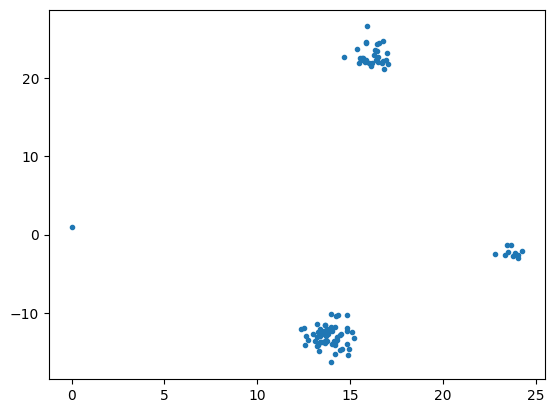

(101, 2)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv('train_data_3.csv', header=None)

# Convert DataFrame to NumPy array
data = df.values

X = data[:,0]
Y = data[:, 1]

#visualising the raw data
#plot X and Y
plt.plot(data[:,0],data[:,1],'.')
plt.show()

print(data.shape)


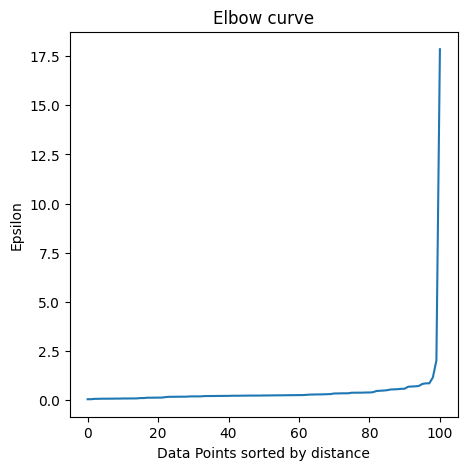

In [ ]:
#qn 2(d)
from sklearn.neighbors import NearestNeighbors
import numpy as np


# create a NearestNeighbors object with n_neighbors=2
neigh = NearestNeighbors(n_neighbors=15)

# fit the model with the data
neigh.fit(data)

# find the 2 nearest neighbors of the first data point
distances, indices = neigh.kneighbors(data)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances1 = distances[:,1]
plt.figure(figsize=(5,5))
plt.plot(distances1)
plt.title('Elbow curve')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

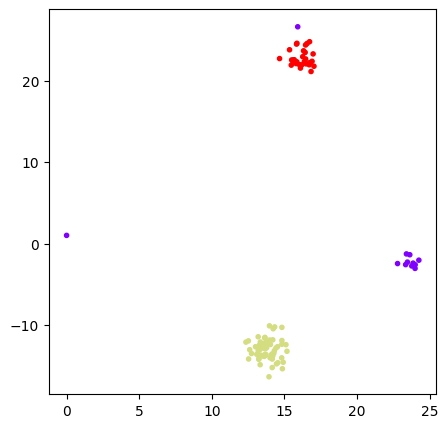

In [ ]:
#best value of epsilon is around 2

#qn 2(d)
#create a class for DBSCAN

class dbscan:
    def __init__(self,data):
        self.data = data

    def fit(self,epsilon,minpts):
        cluster=0
        labels = np.zeros(len(self.data))
        cluster+=1
        for i in range(len(self.data)):
            if labels[i] == 0:
                if self.expand_cluster(i,cluster,epsilon,minpts,labels):
                    cluster+=1
        return labels
        
                
    def expand_cluster(self,i,cluster,epsilon,minpts,labels):
        neighbors = self.region_query(i,epsilon)
        if len(neighbors)<minpts:
            #marking -1 for possible outlier points
            labels[i] = -1
            return False
        else:
            labels[i] = cluster
            for j in neighbors:
                if labels[j] == 0:
                    labels[j] = cluster
                    self.expand_cluster(j,cluster,epsilon,minpts,labels)
                elif labels[j] == -1:
                    #not doing expand_cluster for -1 points as they are already boundary
                    labels[j] = cluster
            return True
    
    def region_query(self,i,epsilon):
        neighbors = []
        for j in range(len(self.data)):
            if np.linalg.norm(self.data[i]-self.data[j])<epsilon:
                neighbors.append(j)
        return neighbors
    

#creating an object of dbscan class
dbscan = dbscan(data)

#best answer i feel
#fitting the model
labels = dbscan.fit(epsilon=2,minpts=15)

#plotting the clusters
plt.figure(figsize=(5,5))
plt.scatter(data[:,0],data[:,1],c=labels,cmap='rainbow',marker = '.')
plt.show()





/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


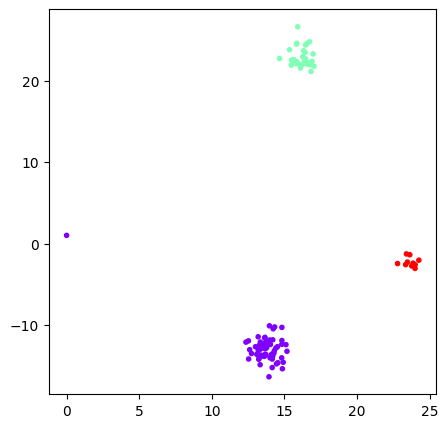

In [ ]:

#qn 2(e)
#implenting k means on data
#with optimum k = 3

from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(data)
labels = cluster.labels_

#plotting the clusters
plt.figure(figsize=(5,5))
plt.scatter(data[:,0],data[:,1],c=labels,cmap='rainbow',marker = '.')
plt.show()


# Yes the initialization value for minpts and epsilon is important which is off than usual.
# Taking 15 as the number of minpoints doesnt help in detecting the small clsuters.

In [ ]:
#pros and cons 

#link for the sheet

#https://docs.google.com/spreadsheets/d/1_XQeITLLhFNivXHybphs2PV288qnH8Nz2MposHxkLhc/edit?usp=sharing
